## EXERCICE 7 : Regression logistique


In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


#### QUESTION 
Il semble qu'un traitement (colonne Treatment) ait un effet sur une variable de "./RealMedicalData2.csv".

Utilisez 'sklearn.linear_model.LogisticRegression' pour trouver cette variable.



In [2]:
#1.1) get the data

dataframe=pandas.read_csv("./RealMedicalData2.csv",sep=';',decimal=b',')

listColNames=list(dataframe.columns)


#1.2) extract X and Y as numpy arrays

XY=dataframe.values
ColNb_Y=listColNames.index('Treatment')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


'Treatment'

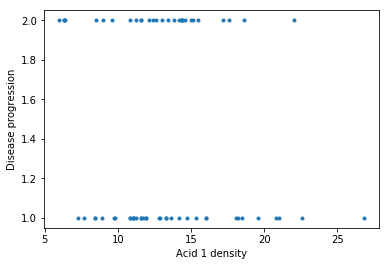

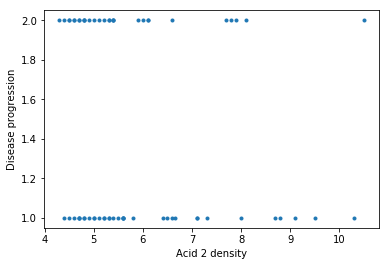

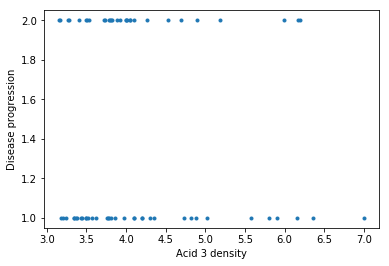

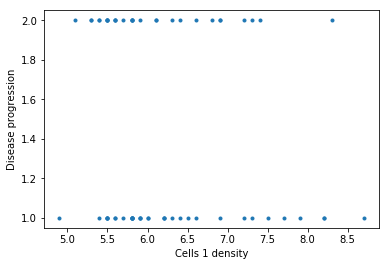

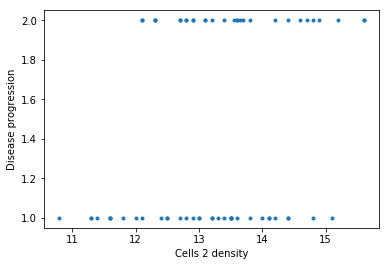

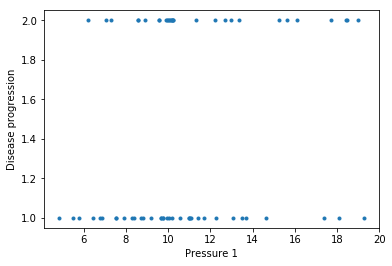

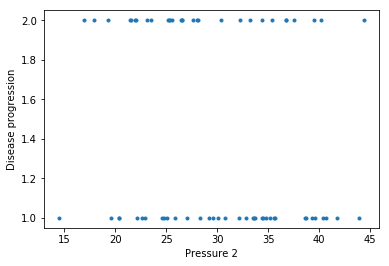

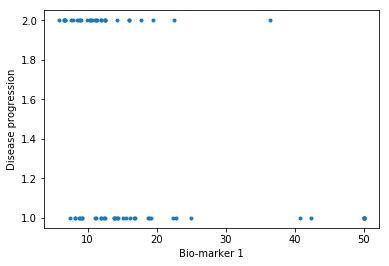

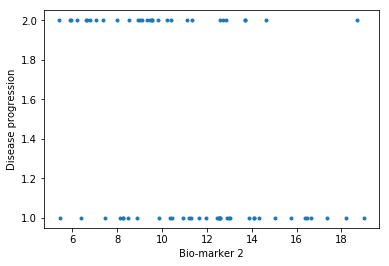

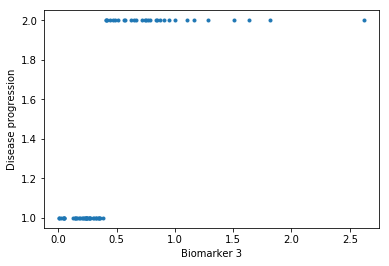

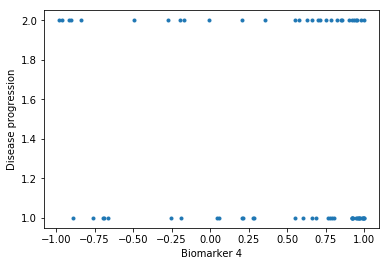

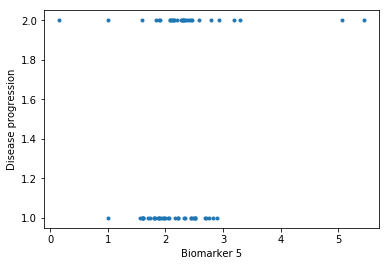

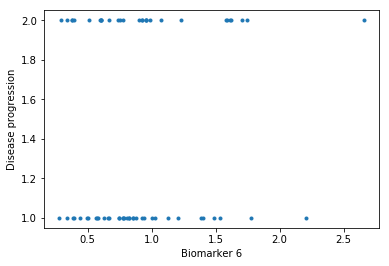

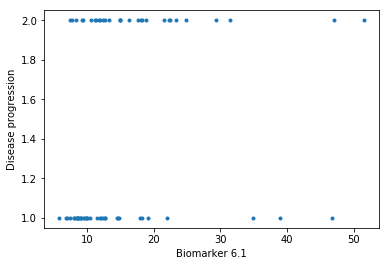

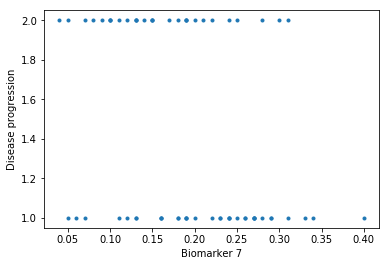

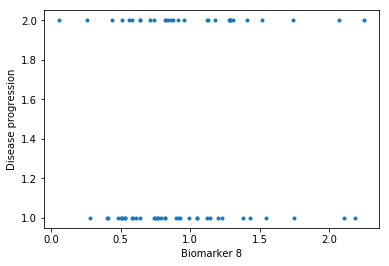

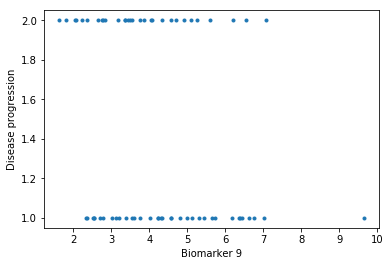

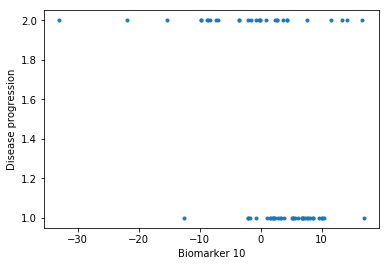

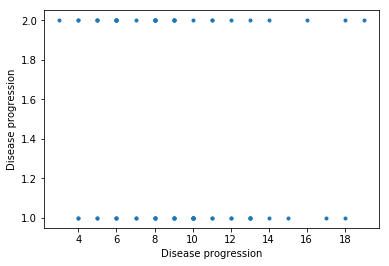

In [3]:


#2) EXPLORE THE DATA

for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Disease progression')
  plt.show()


'Biomarker 3' ressort clairement dans les figures


In [4]:


#3) PERFORM THE REGRESSION

from sklearn.linear_model import LogisticRegression


regressor=LogisticRegression(penalty='l1', C=10.0)

regressor.fit(X_scaled,Y)

print('Beta values')
for Col in range(len(listColNames)):
  print('-> '+listColNames[Col]+': '+str(regressor.coef_[0,Col]))



Beta values
-> Acid 1 density: 0.0
-> Acid 2 density: 0.9742955830994134
-> Acid 3 density: 0.0
-> Cells 1 density: 0.0
-> Cells 2 density: 1.5977097129728515
-> Pressure 1: 0.0
-> Pressure 2: -1.3953899144311555
-> Bio-marker 1: 0.0
-> Bio-marker 2: -0.7514570521969044
-> Biomarker 3: 14.096234221858364
-> Biomarker 4: -0.027141526262598515
-> Biomarker 5: 0.0
-> Biomarker 6: 0.8619479817977913
-> Biomarker 6.1: -0.9282170795675495
-> Biomarker 7: -0.9469250912332483
-> Biomarker 8: 0.0
-> Biomarker 9: 0.0
-> Biomarker 10: -0.2930837288294751
-> Disease progression: -0.8838056846391742


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'Biomarker 3' ressort clairement avec la regression logistique
